In [56]:
import xarray as xr 
import metpy.calc as mpcalc 
from metpy.units import units

shm = xr.open_dataset('http://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface_gauss/shum.2m.mon.mean.nc')['shum']
slp = xr.open_dataset('http://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface_gauss/pres.sfc.mon.mean.nc')['pres']
sst = xr.open_dataset('http://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface_gauss/skt.mon.mean.nc')['skt']
dataset = xr.open_dataset('http://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface_gauss/skt.mon.mean.nc')


In [49]:
import numpy as np 

years = np.arange(1991, 2021)

In [4]:
dew = mpcalc.dewpoint_from_specific_humidity(pressure = slp * units.Pa, specific_humidity = shm * units('g/kg'))

c:\Users\deela\anaconda3\envs\Env5252025\lib\site-packages\metpy\calc\thermo.py:1753: RuntimeWarning: divide by zero encountered in log
  val = np.log(vapor_pressure / mpconsts.nounit.sat_pressure_0c)
c:\Users\deela\anaconda3\envs\Env5252025\lib\site-packages\metpy\calc\thermo.py:1754: RuntimeWarning: invalid value encountered in divide
  return mpconsts.nounit.zero_degc + 243.5 * val / (17.67 - val)


In [10]:
dewpDep = sst * units.degC - dew
print(dewpDep)

<xarray.DataArray (time: 930, lat: 94, lon: 192)> Size: 67MB
<Quantity([[[-3.1991234  -3.2338448  -3.3325577  ... -3.1782799  -3.2262955
   -3.2708397 ]
  [-0.5801811  -0.2960434  -0.33707047 ... -0.9685211  -1.0039673
   -0.7756195 ]
  [-1.2073174  -1.3029404  -1.3077812  ... -0.45399475 -0.4969902
   -0.68123245]
  ...
  [ 0.7322998   0.71966934  0.7492447  ...  0.75170135  0.71782494
    0.7000809 ]
  [ 1.1515713   1.1867676   1.2291718  ...  1.0181446   1.0659523
    1.1416912 ]
  [ 1.117897    1.1018581   1.1194744  ...  1.0998955   1.1156673
    1.121027  ]]

 [[-6.5003777  -6.396641   -6.457657   ... -6.282875   -6.363571
   -6.555645  ]
  [-5.983074   -6.175331   -6.2571754  ... -5.8745155  -6.122593
   -6.0464706 ]
  [-6.2541924  -6.5013275  -6.7528     ... -5.5303764  -5.7396164
   -6.1409492 ]
...
  [12.240318    9.166782    7.21381    ... 16.516567   14.702114
   13.29417   ]
  [ 8.7331085   8.594349    8.580166   ... 13.2880745  13.0141945
   10.991863  ]
  [-0.3904915  -0

In [30]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
import cartopy
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.5
mpl.rcParams['font.family'] = 'Courier New'

def map(interval, labelsize):
    fig = plt.figure(figsize=(14, 6))

    # Add the map and set the extent
    ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
    ax.set_frame_on(False)
    
    # Add state boundaries to plot
    ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor = 'white', zorder = 10)
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth = 0.5, zorder = 11)
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth = 0.25, zorder = 12)
    ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth = 0.25, zorder = 13)
    ax.set_xticks(np.arange(-180, 181, interval), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-90, 91, interval), crs=ccrs.PlateCarree())
    ax.yaxis.set_major_formatter(cticker.LatitudeFormatter())
    ax.xaxis.set_major_formatter(cticker.LongitudeFormatter())

    ax.tick_params(axis='both', labelsize=labelsize, left = False, bottom = False)
    ax.grid(linestyle = '--', which = 'major', alpha = 0.5, color = 'black', linewidth = 0.5, zorder = 9)
    # ax.grid(linestyle = '--', which = 'minor', alpha = 0.5, color = 'black', linewidth = 0.5, zorder = 9)
    # ax.minorticks_on()
    return ax 

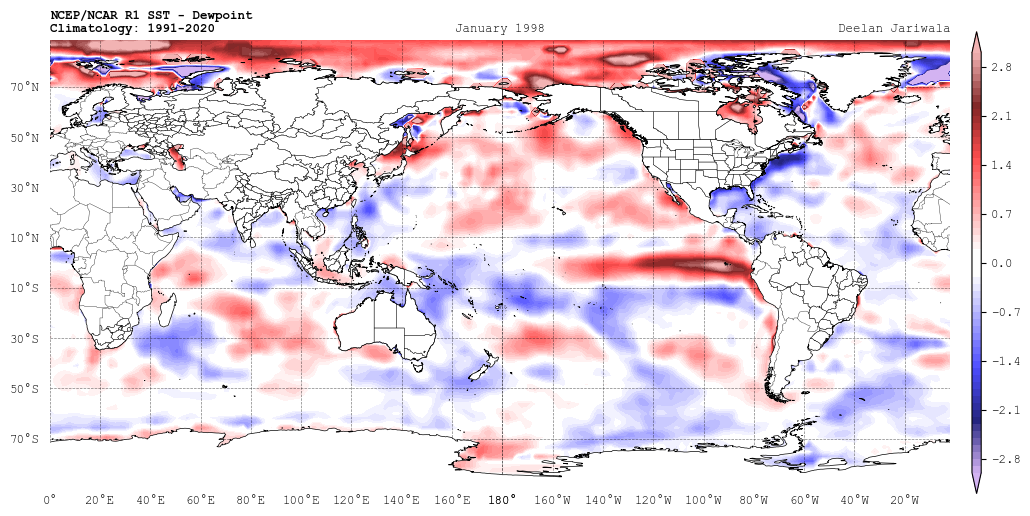

In [52]:
import cmaps as cmap
from helper import numToMonth 

currYear = 1998
month = '01'

months = [np.datetime64(f'{year}-{month.zfill(2)}-01T00') for year in years]
climo = dewpDep.sel(time = months).mean('time')
data = dewpDep.sel(time = np.datetime64(f'{currYear}-{month.zfill(2)}-01T00')) - climo

ax = map(20, 9)
c = plt.contourf(data.lon, data.lat, data.values, cmap = cmap.tempAnoms3(), levels = np.arange(-3, 3.1, .1), extend = 'both', transform = ccrs.PlateCarree(central_longitude = 0))

ax.set_title(f'NCEP/NCAR R1 SST - Dewpoint\nClimatology: 1991-2020', fontweight='bold', fontsize=9, loc='left')

ax.set_title(f'{numToMonth(month)} {currYear}', fontsize=9, loc='center') 
ax.set_title(f'Deelan Jariwala', fontsize=9, loc='right') 
cbar = plt.colorbar(c, orientation = 'vertical', aspect = 50, pad = .02)
cbar.ax.tick_params(axis='both', labelsize=9, left = False, bottom = False)
plt.savefig(r"C:\Users\deela\Downloads\camPlot.png", dpi = 400, bbox_inches = 'tight')
plt.show()

In [53]:
import xarray as xr 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
import cartopy
import numpy as np 
import cmaps as cmap 
import pandas as pd 
from helper import numToMonth
import scipy.stats
from scipy.signal import detrend
import matplotlib as mpl
from ersstTimeseriesGenerator import timeseries 
from regionalACE import createClimoData
from correlationPCA import pcaSeries
import psl
import helper
from scipy.ndimage import gaussian_filter
mpl.rcParams['hatch.linewidth'] = 0.5
mpl.rcParams['font.family'] = 'Courier New'

def map(interval, labelsize):
    fig = plt.figure(figsize=(14, 6))

    # Add the map and set the extent
    ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
    ax.set_frame_on(False)
    
    # Add state boundaries to plot
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth = 0.5)
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth = 0.25)
    ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth = 0.25)
    ax.set_xticks(np.arange(-180, 181, interval), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-90, 91, interval), crs=ccrs.PlateCarree())
    ax.yaxis.set_major_formatter(cticker.LatitudeFormatter())
    ax.xaxis.set_major_formatter(cticker.LongitudeFormatter())

    ax.tick_params(axis='both', labelsize=labelsize, left = False, bottom = False)
    ax.grid(linestyle = '--', which = 'major', alpha = 0.5, color = 'black', linewidth = 0.5, zorder = 9)
    # ax.grid(linestyle = '--', which = 'minor', alpha = 0.5, color = 'black', linewidth = 0.5, zorder = 9)
    # ax.minorticks_on()
    return ax 

def yearlySum(data):
    values = data.values
    values = values.reshape(int(values.shape[0] / 12), 12, 71, 181)
    values = np.sum(values, axis = 1)

    data = data.resample(time = 'AS').mean()
    data.values = values

    return data

def getIndex(ts = False, ACEbox = False, SSTAbox = False, EOFbox = False, **kwargs):
    if ts == True: 
        # index = 'Zach_Residuals'
        # indexMonth = '12'
        # dataMonth = '6'
        # startYear = 1980
        # endYear = 2024
        print(startYear, endYear)
        csv = pd.read_csv(r"C:\Users\deela\Downloads\composites - " + index + ".csv")
        csv = csv[(csv['Year'] >= startYear) & (csv['Year'] <= endYear)]
        print(csv)
        csv = csv[numToMonth(indexMonth)[0:3]]
    elif ACEbox == True:
        # startYear = 1971
        # endYear = 2023
        # indexMonth = '8'
        # dataMonth = '8'
        # day = 365
        # day2 = 233
        # index = f'ACE in Box (to day {day})'
        # lats = [0, 70]
        # lons = [-120, -1]
        boxXCoords = [lons[0], lons[1], lons[1], lons[0], lons[0]]
        boxYCoords = [lats[0], lats[0], lats[1], lats[1], lats[0]]
        csv = createClimoData([startYear, endYear], 'AL', lats, [lons[0] - 360, lons[1] - 360])
        print(csv)
        try:
            csv = csv[day] - csv[day2]
        except:
            csv = csv[day]
    elif SSTAbox == True:
        # startYear = 1971
        # endYear = 2020
        # indexMonth = '7'
        # dataMonth = '7'
        # index = 'SSTAs in Box'
        # lats = [40, 60]
        # lons = [360-70, 360-35]
        boxXCoords = [lons[0], lons[1], lons[1], lons[0], lons[0]]
        boxYCoords = [lats[0], lats[0], lats[1], lats[1], lats[0]]
        csv = timeseries(indexMonth, range(startYear, endYear + 1), slice(lats[1], lats[0]), slice(lons[0], lons[1]))[numToMonth(indexMonth)[0:3]]
    elif EOFbox == True:
        # startYear = 1971
        # endYear = 2023
        # indexMonth = '9'
        # dataMonth = '9'
        # eofNum = 2
        # index = f'EOF{eofNum} of Box'
        # lats = [0, 70]
        # lons = [280, 360]
        boxXCoords = [lons[0] - 360, lons[1] - 360, lons[1] - 360, lons[0] - 360, lons[0] - 360]
        boxYCoords = [lats[0], lats[0], lats[1], lats[1], lats[0]]
        csv = pcaSeries(startYear, endYear, lats, lons, indexMonth, eofNum)[numToMonth(indexMonth)[0:3]]
    
    return csv


['', 'HURDAT2 April 04, 2025', '\r', '    \r', 'AL011851,            UNNAMED,     14,\r', '18510625, 0000,  , HU, 28.0N,  94.8W,  80, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999\r', '18510625, 0600,  , HU, 28.0N,  95.4W,  80, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999\r', '18510625, 1200,  , HU, 28.0N,  96.0W,  80, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999\r', '18510625, 1800,  , HU, 28.1N,  96.5W,  80, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999\r', '18510625, 2100, L, HU, 28.2N,  96.8W,  80, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999\r', '18510626, 0000,  , HU, 28.2N,  97.0W,  70, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999\r', '18510626, 0600,  , TS, 28.3N,  97.6W,  60, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -9

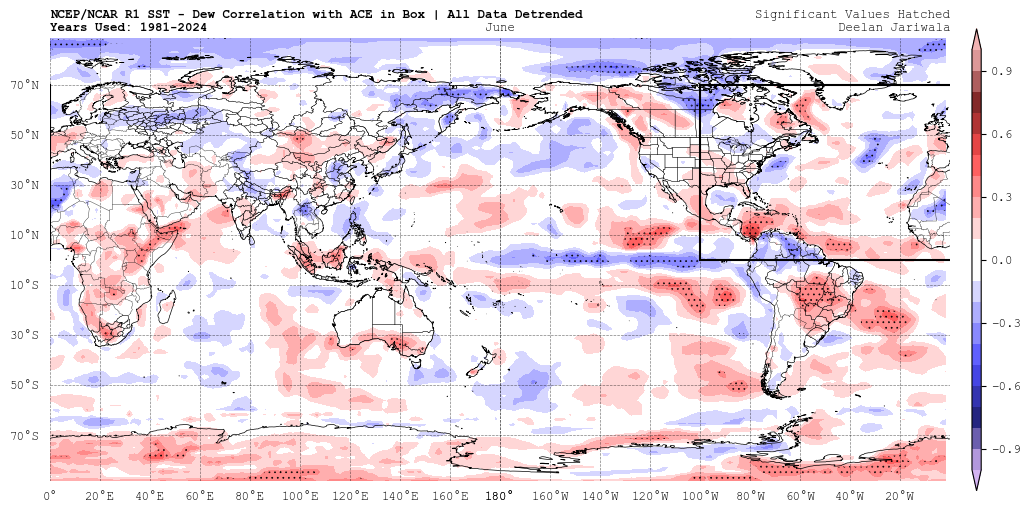

In [58]:
index = 'ACE in Box'
dataMonth = '6'
indexMonth = '12'
startYear = 1981
endYear = 2024
day = 365
lats = [0, 70]
lons = [360 - 100, 360 - 0]
boxXCoords = [lons[0], lons[1], lons[1], lons[0], lons[0]]
boxYCoords = [lats[0], lats[0], lats[1], lats[1], lats[0]]
csv = getIndex(ACEbox= True, day = day, startYear = startYear, endYear = endYear, lats = lats, lons = lons)
print(csv)

data = dewpDep

fMonths = np.array([np.datetime64(f'{y}-{str(dataMonth).zfill(2)}-01') for y in range(startYear, endYear + 1)])
data = data.sel(time = fMonths)
ogShape = data.shape

temp = np.nan_to_num(data.values)
temp = np.reshape(temp, (ogShape[0], ogShape[1] * ogShape[2]))
temp = detrend(temp, axis = 0)
print(temp.shape, csv.shape)

corrData = []
signData = []
for x in range(temp.shape[1]):
    temp[:, x] = np.nan_to_num(temp[:, x])
    corr, sig = scipy.stats.pearsonr(temp[:, x], csv)
    corrData.append(corr)
    signData.append(sig)

print(np.array(corrData).shape)
data = data.mean('time')
data.values = np.reshape(corrData, (ogShape[1], ogShape[2]))
dataset['sig'] = ((ogShape[1], ogShape[2]), np.reshape(signData, (ogShape[1], ogShape[2])))

ax = map(20, 9)
# ax.set_extent([180, 359.9, 0, 70], crs = ccrs.PlateCarree())
try:
    c = plt.contourf(data.longitude, data.latitude, data.values, cmap = cmap.tempAnoms3(), levels = np.arange(-1, 1.1, .1), extend = 'both', transform = ccrs.PlateCarree(central_longitude = 0))
    # c = plt.pcolormesh(data.longitude, data.latitude, data.values, cmap = cmap.tempAnoms3(), vmin = -1, vmax = 1.1, transform = ccrs.PlateCarree(central_longitude = 0))
    h = plt.contourf(data.longitude, data.latitude, dataset['sig'].values, colors = 'none', levels = np.arange(0, 0.06, 0.01), hatches = ['...'], transform = ccrs.PlateCarree(central_longitude = 0))
except:
    c = plt.contourf(data.lon, data.lat, data.values, cmap = cmap.tempAnoms3(), levels = np.arange(-1, 1.1, .1), extend = 'both', transform = ccrs.PlateCarree(central_longitude = 0))
    # c = plt.pcolormesh(data.lon, data.lat, data.values, cmap = cmap.tempAnoms3().reversed(), vmin = -1, vmax = 1.1, transform = ccrs.PlateCarree(central_longitude = 0))
    h = plt.contourf(data.lon, data.lat, dataset['sig'].values, colors = 'none', levels = np.arange(0, 0.06, 0.01), hatches = ['...'], transform = ccrs.PlateCarree(central_longitude = 0))

try:
    for y in range(len(boxXCoords)):
        try:
            print([boxXCoords[y], boxXCoords[y + 1]], [boxYCoords[y], boxYCoords[y + 1]])
            ax.plot([boxXCoords[y], boxXCoords[y + 1]], [boxYCoords[y], boxYCoords[y + 1]], color = 'black', zorder = 20, transform = ccrs.PlateCarree(central_longitude = 360))
        except:
            pass
except:
    pass

try:
    for collection in h.collections:
        collection.set_edgecolor('#262626')
        collection.set_linewidth(0)
except:
    pass

ax.set_title(f'NCEP/NCAR R1 SST - Dew Correlation with {index} | All Data Detrended\nYears Used: {startYear}-{endYear}', fontweight='bold', fontsize=9, loc='left')
# ax.set_title(f'ERSSTv5 Correlation with {numToMonth(indexMonth)} {index} | All Data Detrended\nYears Used: {startYear}-{endYear}', fontweight='bold', fontsize=9, loc='left')
#ax.set_title(f'AMSU Tropopause (TTS) Brightness Temp. Correlation with {numToMonth(indexMonth)} {index} | All Data Detrended\nYears Used: {startYear}-{endYear}', fontweight='bold', fontsize=9, loc='left')
# ax.set_title(f'ERSSTv5 Correlation with {index} | All Data Detrended\nYears Used: {startYear}-{endYear}', fontweight='bold', fontsize=9, loc='left')
# ax.set_title(f'HURDAT2 ACE Density Correlation with {numToMonth(indexMonth)} {index.upper()}\nYears Used: {startYear}-{endYear}', fontweight='bold', fontsize=9, loc='left')
ax.set_title(f'{numToMonth(dataMonth)}', fontsize=9, loc='center') 
ax.set_title(f'Significant Values Hatched\nDeelan Jariwala', fontsize=9, loc='right') 
cbar = plt.colorbar(c, orientation = 'vertical', aspect = 50, pad = .02)
cbar.ax.tick_params(axis='both', labelsize=9, left = False, bottom = False)
plt.savefig(r"C:\Users\deela\Downloads\correlationPlot" + dataMonth + "_" + index + ".png", dpi = 400, bbox_inches = 'tight')
plt.show()